In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read csv files and make a copy to not manipulate original data
products = pd.read_csv(r"products.csv")
orders = pd.read_csv(r"orders.csv")
orderlines = pd.read_csv(r"orderlines.csv")
brands = pd.read_csv(r"brands.csv")
ol_df = orderlines.copy()
products_df = products.copy()
orders_df = orders.copy()
brands_df = brands.copy()

In [3]:
orders_df.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [4]:
orders_df.duplicated().sum()

0

In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


* ### we have 5 missing values in *total_paid*
* ### we have to change created_date to datetime
* ### there is no duplicated rows

In [6]:
# find the proportion of NaN values
orders_df['total_paid'].isna().value_counts(normalize=True)

total_paid
False    0.999978
True     0.000022
Name: proportion, dtype: float64

In [7]:
# removing 5 rows with missing values 
orders_df = orders_df.loc[~orders_df['total_paid'].isna() , :]

In [8]:
# convert object type to datetime
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])

In [9]:
ol_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [10]:
ol_df.duplicated().sum()

0

In [11]:
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


* ### we don't have missing values
* ### we have to change date to datetime 
* ### we don't have duplicated rows
* ### we should change unit_price to float

In [12]:
ol_df['date'] = pd.to_datetime(ol_df['date'])

In [13]:
ol_df['unit_price'].str.contains('\d+\.\d+\.\d+').value_counts()

unit_price
False    257814
True      36169
Name: count, dtype: int64

In [14]:
two_dot_ol = ol_df.loc[ol_df['unit_price'].str.contains('\d+\.\d+\.\d+'), 'id_order']
ol_df = ol_df.loc[~ol_df['id_order'].isin(two_dot_ol)]

In [15]:
ol_df['unit_price'].str.contains('\d+\.\d+\.\d+').value_counts()

unit_price
False    216250
Name: count, dtype: int64

In [16]:
ol_df['unit_price'] = pd.to_numeric(ol_df['unit_price'])

In [17]:
products = pd.read_csv('products.csv')
products_df = products.copy()

In [18]:
products_df.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [19]:
products.duplicated().sum()

8746

In [20]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


* ### we have 7 NaN values in *desc* column
* ### we have 45 NaN values in *price* 
* ### we have 50 NaN values in *type*
* ### there are 8746 duplicated in products
* ### *price* column has to be float 

In [21]:
products_df = products_df.drop_duplicates()

In [22]:
products_df.duplicated().sum()

0

In [23]:
# we have 1 duplicated value in 'sku' while our column should be unique
products_df.duplicated(subset='sku').sum()

1

In [24]:
# we try to find the duplicated 'sku'
products_df.loc[products_df['sku'].duplicated() == True]

,sku,name,desc,price,promo_price,in_stock,type
8000,APP1197,"Apple iMac 21.5 ""Core i5 31 GHz Retina display...",Desktop Apple iMac 21.5 inch i5 31 GHz Retina ...,NaN,1305.59,0,1282


In [25]:
# drop duplicated 'sku'
products_df = products_df.drop_duplicates(subset='sku')

In [26]:
products_df.loc[products_df['sku'] == 'APP1197']

,sku,name,desc,price,promo_price,in_stock,type
7992,APP1197,"Apple iMac 21.5 ""Core i5 31 GHz Retina display...",Desktop Apple iMac 21.5 inch i5 31 GHz Retina ...,1729,1305.59,0,1282


In [27]:
# fillig null values in 'desc' column with 'name' column
products_df.loc[products_df['desc'].isna(), 'desc'] = products_df.loc[products_df['desc'].isna(), 'name']

In [28]:
products_df.loc[products_df['desc'].isna(),:]

,sku,name,desc,price,promo_price,in_stock,type


In [29]:
# check the null values in 'price'
products_df['price'].isna().sum()

45

In [30]:
print(f"The missing values in price are{(products_df['price'].isna().value_counts(normalize=True)[1] * 100).round(2)}% of all rows in the DataFrame")

The missing values in price are0.43% of all rows in the DataFrame


In [31]:
# remove missing values in 'price'
products_df = products_df.loc[~products_df['price'].isna()]

In [32]:
products_df['price'].isna().sum()

0

In [33]:
price_problem_products = products_df.loc[products_df['price'].astype(str).str.contains("\d+\.\d+\.\d+")|products_df['price'].astype(str).str.contains("\d+\.\d{3,}"),:].shape[0]
price_problem_products

542

In [34]:
print(f"The column price has in total {price_problem_products} wrong values. This is {round(((price_problem_products / products_df.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column price has in total 542 wrong values. This is 5.15% of the rows of the DataFrame


In [35]:
products_df.loc[(products_df.price.astype(str).str.contains("\d+\.\d+\.\d+"))&(products_df.price.astype(str).str.contains("\d+\.\d{3,}")), :]

,sku,name,desc,price,promo_price,in_stock,type
665,CRU0015-2,Crucial memory Mac 16GB (2x8GB) SO-DIMM DDR3 1...,RAM 16GB (2x8GB) 135V MacBook Pro iMac (2012/2...,1.639.792,1.629.894,1,1364
792,APP0672,Apple iPhone 5S 16GB Space Gray,New iPhone 5S 16G Libre (ME432Y / AB).,4.694.994,4.694.994,0,NaN
797,APP0673,Apple iPhone 5S 16GB Silver,New Free iPhone 5S 16GB (ME433Y / A).,4.090.042,4.090.042,0,NaN
827,PAC0339,NewerTech miniStack 4TB Hard Drive Mac,External Box Hard Drive Mac + 4TB.,2.199.791,2.199.901,0,11935397
885,PAC0376,OWC Mercury Elite Pro Dual Thunderbolt + 8TB,RAID outer box 35 inch SATA connection Thunder...,5.609.698,5.549.895,0,11935397
...,...,...,...,...,...,...,...
19312,REP0424,Input repair Headphones iPad,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19313,REP0421,iPad charging connector repair,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19314,REP0416,iPad front camera repair,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19315,REP0413,repair rear camera iPad,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"


In [36]:
# removing the prices with two dots and three decimal places 
products_df = products_df.loc[(~products_df['price'].astype(str).str.contains("\d+\.\d+\.\d+"))&(~products_df['price'].astype(str).str.contains("\d+\.\d{3,}")), :]

In [37]:
# convert 'price' to numeric 
products_df["price"] = pd.to_numeric(products_df["price"])

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9992 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9992 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 624.5+ KB


## at this stage we are done with cleaning all of the files regarding duplicates, null values and data types. now we dig deeper into data quality assessment in order to check for the consistency

### Quality assessment 
#### exclude unwanted orders 

In [39]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [40]:
# we keep 'completed' and 'place order' in our dataframe
orders_df['state'].value_counts(normalize=True)* 100

state
Shopping Basket   51.92
Completed         20.54
Place Order       18.02
Pending            6.33
Cancelled          3.19
Name: proportion, dtype: float64

In [41]:
# Filter down to completed orders
orders_complete = orders_df.loc[orders_df['state'].isin(['Completed' ,'Place Order'])].copy()

# Filter out orderlines that have no corresponding order
ol_clean = ol_df.loc[ol_df['id_order'].isin(orders_complete['order_id'])].copy()

# Filter out orders without corresponding orderlines
orders_clean = orders_df.loc[orders_df['order_id'].isin(ol_clean['id_order'])].copy()

In [42]:
# 
print(ol_clean['id_order'].nunique())
print(orders_clean['order_id'].nunique())

66568
66568


### The last and cleaned version of tables are:
* ### orders_clean
* ### ol_clean
* ### products_df(we didn't change this table in this stage)


#### exclude unwanted products

In [43]:
# listing unique 'sku' from products table
existing_products = list(products_df['sku'].unique())

In [44]:
# orders containing unique products are 'False' in 'corrupted' column and orders not containing these products are 'True'
ol_clean['corrupted'] = ~ol_clean['sku'].isin(existing_products)


In [45]:
ol_clean

,id,id_order,product_id,product_quantity,sku,unit_price,date,corrupted
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,False
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,False
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,False
17,1119133,299555,0,1,BEA0065,256.49,2017-01-01 02:18:45,False
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,False
...,...,...,...,...,...,...,...,...
293973,1650193,527394,0,1,APP1922,161.00,2018-03-14 13:55:15,False
293975,1650195,527396,0,1,PAC0653,141.58,2018-03-14 13:55:44,False
293976,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02,False
293977,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38,False


In [46]:
# listing id orders with True value in 'corrupted' column
bad_orders = list(ol_clean.loc[ol_clean['corrupted'] == True, 'id_order'])

In [47]:
# clean ol_clean and orders_clean with unique and existing products
ol_good = ol_clean.loc[~ol_clean['id_order'].isin(bad_orders)]
orders_good = orders_clean.loc[~orders_clean['order_id'].isin(bad_orders)]

In [48]:
#comparing the number of order id
print(ol_good['id_order'].nunique())
print(orders_good['order_id'].nunique())

64487
64487


In [49]:
ol_good = ol_good.copy()
ol_good['unit_price_total']= ol_good['unit_price'] * ol_good['product_quantity']

In [50]:
ol_good

,id,id_order,product_id,product_quantity,sku,unit_price,date,corrupted,unit_price_total
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,False,47.49
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,False,18.99
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,False,72.19
17,1119133,299555,0,1,BEA0065,256.49,2017-01-01 02:18:45,False,256.49
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,False,60.90
...,...,...,...,...,...,...,...,...,...
293973,1650193,527394,0,1,APP1922,161.00,2018-03-14 13:55:15,False,161.00
293975,1650195,527396,0,1,PAC0653,141.58,2018-03-14 13:55:44,False,141.58
293976,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02,False,249.99
293977,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38,False,42.99


In [51]:
ol_good.groupby('id_order')[['unit_price_total']].sum()

,unit_price_total
id_order,
241423,129.16
242832,10.77
243330,77.99
245275,149.00
245595,105.98
...,...
527386,161.00
527394,161.00
527396,141.58


In [52]:
# calculating the difference of total paid(from products) and unit price total(actual paid money)
o_ol_merge = pd.merge(ol_good.groupby('id_order')['unit_price_total'].sum(),
                      orders_good,
                      left_on = 'id_order',
                      right_on = 'order_id')

o_ol_merge['diff'] = o_ol_merge['total_paid'] - o_ol_merge['unit_price_total']

In [53]:
orders.loc[orders["order_id"]==293308]

,order_id,created_date,total_paid,state
138,293308,2017-01-01 13:33:43,2635.47,Completed


In [54]:
ol_products=pd.merge(ol_good,products_df,on="sku",how="left")

In [55]:
ol_products.shape

(80782, 15)

In [56]:
ol_products["category"] = ""
ol_products["category"].apply(lambda x: x.strip() == "").sum()

80782

In [57]:
ol_products["category"].apply(lambda x: x.strip() == "").sum()

80782

## Now we create categories for the products

In [58]:
ol_products["category"] = ""

In [59]:
# Set all names of mac and price > 500 as computer
ol_products.loc[(ol_products["name"].str.contains("mac", case=False)) & (ol_products["unit_price"] > 500), "category"] = "apple_computer"
# Chargers
ol_products.loc[(ol_products["name"].str.contains("charge", case=False))|(ol_products["name"].str.contains("cable", case=False))|(ol_products["name"].str.contains("lightning", case=False))|(ol_products["name"].str.contains("wireless charging", case=False)),"category"]="charger"
# Screen Protector
ol_products.loc[(ol_products["name"].str.contains("glass", case=False))|(ol_products["name"].str.contains("screen", case=False))|(ol_products["name"].str.contains("protector", case=False)),"category"]="Screen protector"
#Headsets
ol_products.loc[(ol_products["name"].str.contains("head", case=False)),"category"]="earphones"
#Memory_Ram
ol_products.loc[(ol_products["name"].str.contains("ddr", case=False)),"category"]="memory_ram"
#Speaker
ol_products.loc[(ol_products["name"].str.contains("speaker", case=False)),"category"]="speaker"
#Battery
ol_products.loc[(ol_products["name"].str.contains("battery", case=False)),"category"]="Battery"
#Adapter
ol_products.loc[(ol_products["name"].str.contains("adapter", case=False)),"category"]="adapter"
#Monitor
ol_products.loc[(ol_products["name"].str.contains("monitor", case=False)),"category"]="monitor"
#Ipad
ol_products.loc[(ol_products["name"].str.contains("ipad", case=False)) & (ol_products["unit_price"] > 300), "category"] = "ipad"
#Iphones
ol_products.loc[(ol_products["name"].str.contains("iphone", case=False)) & (ol_products["unit_price"] > 250), "category"] = "iphone"
#NAS storage
ol_products.loc[(ol_products["name"].str.contains("nas", case=False)),"category"]="nas_storage"
# Phone cases per type
ol_products.loc[(ol_products["type"] == "11865403") | (ol_products["name"].str.contains("case", case=False)), "category"] = "phone_cases"
#HDD storage
ol_products.loc[((ol_products["name"].str.contains("hard disk", case=False)) | (ol_products["name"].str.contains("hard drive", case=False)) | (ol_products["name"].str.contains("ssd", case=False))|(ol_products["name"].str.contains("memory card", case=False))|(ol_products["name"].str.contains("flash drive", case=False))|(ol_products["name"].str.contains("tb", case=False)))& (ol_products["unit_price"] < 500), "category"] = "hdd_storage"
#Keyboard
ol_products.loc[(ol_products["name"].str.contains("keyboard", case=False)),"category"]="keyboard"
#Cover
ol_products.loc[(ol_products["desc"].str.contains("cover", case=False)),"category"]="cover"
#Drone
ol_products.loc[(ol_products["name"].str.contains("drone", case=False)) & (ol_products["unit_price"] > 60), "category"] = "drone"
#Router
ol_products.loc[(ol_products["name"].str.contains("router", case=False)),"category"]="router"
#AppleCare
ol_products.loc[(ol_products["name"].str.contains("applecare", case=False)),"category"]="applecare"

In [60]:
orders_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [61]:
ol_good

,id,id_order,product_id,product_quantity,sku,unit_price,date,corrupted,unit_price_total
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,False,47.49
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,False,18.99
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,False,72.19
17,1119133,299555,0,1,BEA0065,256.49,2017-01-01 02:18:45,False,256.49
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,False,60.90
...,...,...,...,...,...,...,...,...,...
293973,1650193,527394,0,1,APP1922,161.00,2018-03-14 13:55:15,False,161.00
293975,1650195,527396,0,1,PAC0653,141.58,2018-03-14 13:55:44,False,141.58
293976,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02,False,249.99
293977,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38,False,42.99


In [62]:
o_ol_merge.loc[o_ol_merge["order_id"]==293308]

,unit_price_total,order_id,created_date,total_paid,state,diff
81,66.49,293308,2017-01-01 13:33:43,2635.47,Completed,2568.98


In [63]:
o_ol_merge.loc[(o_ol_merge["diff"]>20)].count()

unit_price_total    58
order_id            58
created_date        58
total_paid          58
state               58
diff                58
dtype: int64

In [64]:
ol_clean.loc[ol_clean["id_order"]==293308]

,id,id_order,product_id,product_quantity,sku,unit_price,date,corrupted
185,1119451,293308,0,1,HGD0007,66.49,2017-01-01 13:29:10,False


In [65]:
ol_clean

,id,id_order,product_id,product_quantity,sku,unit_price,date,corrupted
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,False
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,False
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,False
17,1119133,299555,0,1,BEA0065,256.49,2017-01-01 02:18:45,False
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,False
...,...,...,...,...,...,...,...,...
293973,1650193,527394,0,1,APP1922,161.00,2018-03-14 13:55:15,False
293975,1650195,527396,0,1,PAC0653,141.58,2018-03-14 13:55:44,False
293976,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02,False
293977,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38,False


In [66]:
# your code here
Q1 = o_ol_merge["diff"].quantile(0.25)
Q3 = o_ol_merge["diff"].quantile(0.75)
# calculate the interquartile range
IQR = Q3-Q1
# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = o_ol_merge.loc[(o_ol_merge["diff"] >= (Q1 - 1.5*IQR)) & (o_ol_merge["diff"] <= (Q3 + 1.5*IQR)), :]

In [67]:
diff_no_outliers_df

,unit_price_total,order_id,created_date,total_paid,state,diff
0,129.16,241423,2017-11-06 13:10:02,136.15,Completed,6.99
1,10.77,242832,2017-12-31 17:40:03,15.76,Completed,4.99
2,77.99,243330,2017-02-16 10:59:38,84.98,Completed,6.99
3,149.00,245275,2017-06-28 11:35:37,149.00,Completed,0.00
4,105.98,245595,2017-01-21 12:52:47,112.97,Completed,6.99
...,...,...,...,...,...,...
64482,161.00,527386,2018-03-14 13:49:48,161.00,Place Order,0.00
64483,161.00,527394,2018-03-14 13:55:15,161.00,Place Order,0.00
64484,141.58,527396,2018-03-14 13:55:44,141.58,Place Order,0.00
64485,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,0.00


# Tables we have right now 
#### ol_good , orders_good and products_df

In [68]:
#First we merge Orderlines with products to get product info
ol_products=pd.merge(ol_good,products_df,on="sku",how="left")

In [69]:
ol_products.drop(["product_id","promo_price","in_stock","type"],axis=1,inplace=True)

In [70]:
ol_products["discounts"]=ol_products["price"]-ol_products["unit_price"]
ol_products["dis_percent"]=100-(ol_products["unit_price"]/ol_products["price"]*100)

In [71]:
#We merge OL_products to orders
master = pd.merge(ol_products.groupby('id_order')[['unit_price_total',"price","discounts"]].sum(),
                      orders_good,
                      left_on = 'id_order',
                      right_on = 'order_id')

In [72]:
discounts_percent_mean = ol_products.groupby('id_order')['dis_percent'].mean()

In [73]:
master["diff"]=master["total_paid"]-master["unit_price_total"]

In [74]:
column_order = ['order_id','created_date','unit_price_total', 'total_paid','price','diff','discounts','state']
master = master.reindex(columns=column_order)

In [75]:
master['discounts_percent'] = master['order_id'].map(discounts_percent_mean)

In [76]:
# Removing the bad stuff - Sama's code
Q1 = master["diff"].quantile(0.25)
Q3 = master["diff"].quantile(0.75)
# calculate the interquartile range
IQR = Q3-Q1
# filter the DataFrame to include only "non-outliers"
new_master = master.loc[(master["diff"] >= (Q1 - 1.5*IQR)) & (master["diff"] <= (Q3 + 1.5*IQR)), :]

In [77]:
new_master


,order_id,created_date,unit_price_total,total_paid,price,diff,discounts,state,discounts_percent
0,241423,2017-11-06 13:10:02,129.16,136.15,139.99,6.99,10.83,Completed,7.74
1,242832,2017-12-31 17:40:03,10.77,15.76,17.99,4.99,7.22,Completed,40.13
2,243330,2017-02-16 10:59:38,77.99,84.98,99.99,6.99,22.00,Completed,22.00
3,245275,2017-06-28 11:35:37,149.00,149.00,179.00,0.00,30.00,Completed,16.76
4,245595,2017-01-21 12:52:47,105.98,112.97,103.95,6.99,50.96,Completed,49.02
...,...,...,...,...,...,...,...,...,...
64482,527386,2018-03-14 13:49:48,161.00,161.00,179.00,0.00,18.00,Place Order,10.06
64483,527394,2018-03-14 13:55:15,161.00,161.00,179.00,0.00,18.00,Place Order,10.06
64484,527396,2018-03-14 13:55:44,141.58,141.58,215.98,0.00,74.40,Place Order,34.45
64485,527397,2018-03-14 13:56:38,42.99,42.99,49.95,0.00,6.96,Place Order,13.93


In [78]:
new_master["diff"].describe()

count   63141.00
mean        3.13
std         2.98
min        -5.00
25%         0.00
50%         3.99
75%         4.99
max        11.99
Name: diff, dtype: float64

In [79]:
ol_products["symbol"]=ol_products["sku"].str[:3]

In [80]:
ol_products_full=pd.merge(ol_products,brands,left_on="symbol",right_on="short",how="left")

In [81]:
ol_products_full.drop(["short"],axis=1,inplace=True)

In [82]:
ol_products_full.rename(columns={"long": "brand"},inplace=True)


### Now that we have all the required data in the right order, we can create graphs
### The files presently are called 
## ol_products_full and new_master

In [83]:
new_master

,order_id,created_date,unit_price_total,total_paid,price,diff,discounts,state,discounts_percent
0,241423,2017-11-06 13:10:02,129.16,136.15,139.99,6.99,10.83,Completed,7.74
1,242832,2017-12-31 17:40:03,10.77,15.76,17.99,4.99,7.22,Completed,40.13
2,243330,2017-02-16 10:59:38,77.99,84.98,99.99,6.99,22.00,Completed,22.00
3,245275,2017-06-28 11:35:37,149.00,149.00,179.00,0.00,30.00,Completed,16.76
4,245595,2017-01-21 12:52:47,105.98,112.97,103.95,6.99,50.96,Completed,49.02
...,...,...,...,...,...,...,...,...,...
64482,527386,2018-03-14 13:49:48,161.00,161.00,179.00,0.00,18.00,Place Order,10.06
64483,527394,2018-03-14 13:55:15,161.00,161.00,179.00,0.00,18.00,Place Order,10.06
64484,527396,2018-03-14 13:55:44,141.58,141.58,215.98,0.00,74.40,Place Order,34.45
64485,527397,2018-03-14 13:56:38,42.99,42.99,49.95,0.00,6.96,Place Order,13.93


In [84]:
# Assuming ol_products_full and new_master are your DataFrames
ol_products_full.to_csv('ol_products_full.csv', index=False)
new_master.to_csv('new_master.csv', index=False)


In [85]:
# Count the number of products being discounted
discounted_products_count = ol_products_full[ol_products_full['dis_percent'] > 0].shape[0]

print("Number of products being discounted:", discounted_products_count)


Number of products being discounted: 74074


In [86]:
#How big are the offered discounts as a percentage of the product prices?
ol_products.loc[ol_products["dis_percent"]==97.71265189421015]

,id,id_order,product_quantity,sku,unit_price,date,corrupted,unit_price_total,name,desc,price,discounts,dis_percent,symbol
76100,1615825,512451,5,MOP0107,1.60,2018-02-16 08:35:43,False,8.00,Mophie Powerstation 4000mAh Battery Plus Mini ...,external battery capacity 4000mAh output volta...,69.95,68.35,97.71,MOP
76120,1615921,512498,5,MOP0107,1.60,2018-02-16 08:54:42,False,8.00,Mophie Powerstation 4000mAh Battery Plus Mini ...,external battery capacity 4000mAh output volta...,69.95,68.35,97.71,MOP


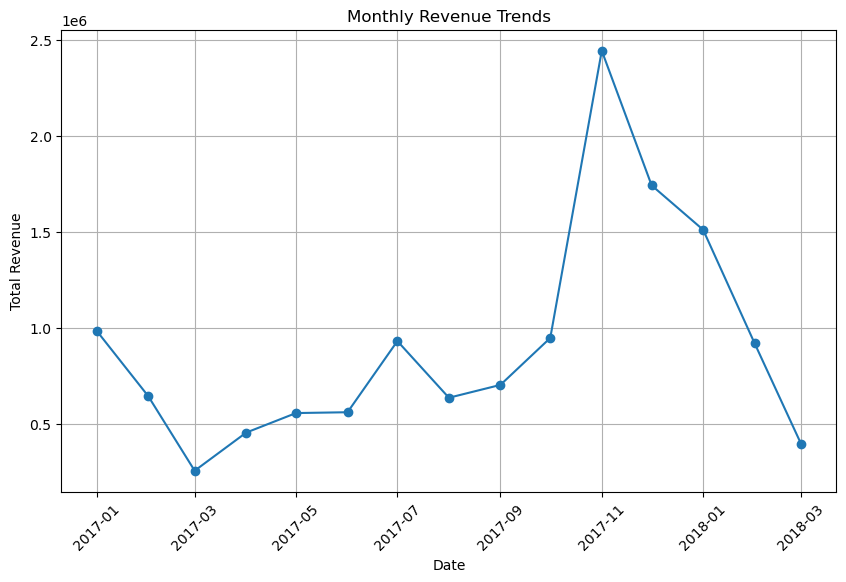

In [87]:
# How do seasonality and special dates (Christmas, Black Friday) affect sales?
# Extract month and year from the 'created_date' column
new_master['month'] = new_master['created_date'].dt.month
new_master['year'] = new_master['created_date'].dt.year

# Group by month and year, calculate total revenue
monthly_revenue = new_master.groupby(['year', 'month'])['total_paid'].sum().reset_index()

# Convert year and month back to datetime format for plotting
monthly_revenue['date'] = pd.to_datetime(monthly_revenue[['year', 'month']].assign(day=1))

# Plot monthly revenue trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['date'], monthly_revenue['total_paid'], marker='o', linestyle='-')
plt.title('Monthly Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

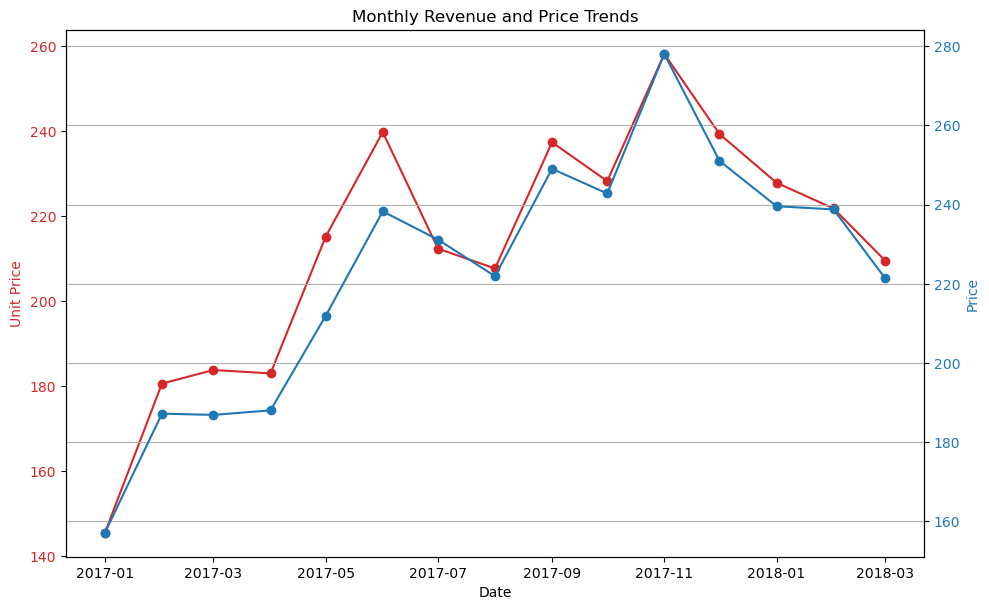

In [134]:
# Group by month and year, calculate total revenue and average price
monthly_revenue = new_master.groupby(['year', 'month']).agg({'total_paid': 'mean', 'price': 'mean'}).reset_index()

# Convert year and month back to datetime format for plotting
monthly_revenue['date'] = pd.to_datetime(monthly_revenue[['year', 'month']].assign(day=1))

# Plot monthly revenue trends with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unit Price', color=color)
ax1.plot(monthly_revenue['date'], monthly_revenue['total_paid'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  
ax2.plot(monthly_revenue['date'], monthly_revenue['price'], color=color, marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Monthly Revenue and Price Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

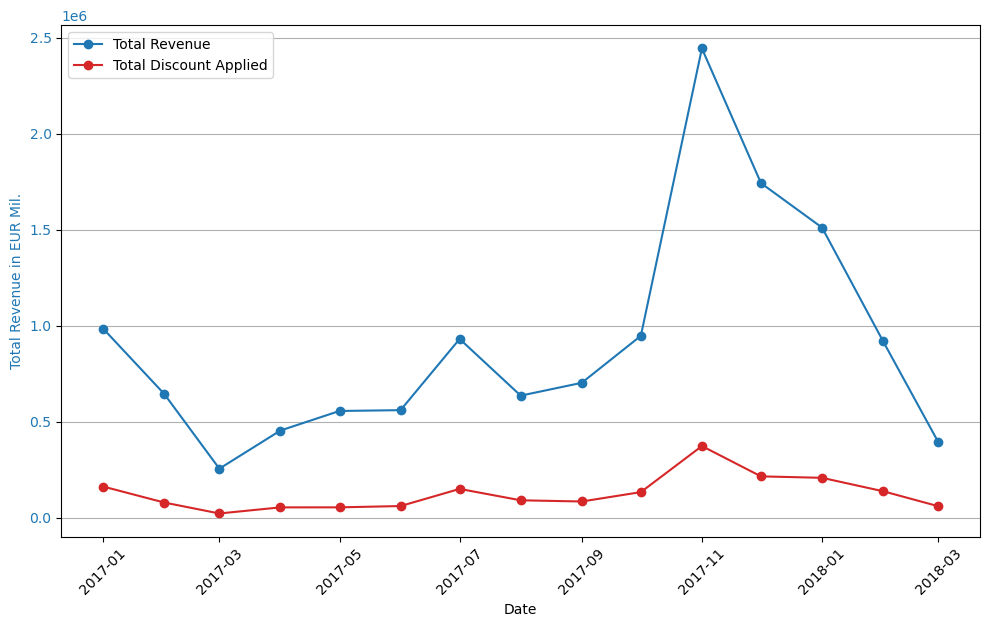

In [156]:
# Group by month and year, calculate total revenue and average price
monthly_revenue = new_master.groupby(['year', 'month']).agg({'total_paid': 'sum', 'price': 'sum', 'discounts': 'sum'}).reset_index()

# Convert year and month back to datetime format for plotting
monthly_revenue['date'] = pd.to_datetime(monthly_revenue[['year', 'month']].assign(day=1))

# Plot monthly revenue trends with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Revenue in EUR Mil.', color=color)
ax1.plot(monthly_revenue['date'], monthly_revenue['total_paid'], color=color, marker='o', linestyle='-', label='Total Revenue')
ax1.tick_params(axis='y', labelcolor=color)

# Plot total discounts
ax1.plot(monthly_revenue['date'], monthly_revenue['discounts'], color='tab:red', marker='o', linestyle='-', label='Total Discount Applied')
ax1.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='upper left')

fig.tight_layout()  

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


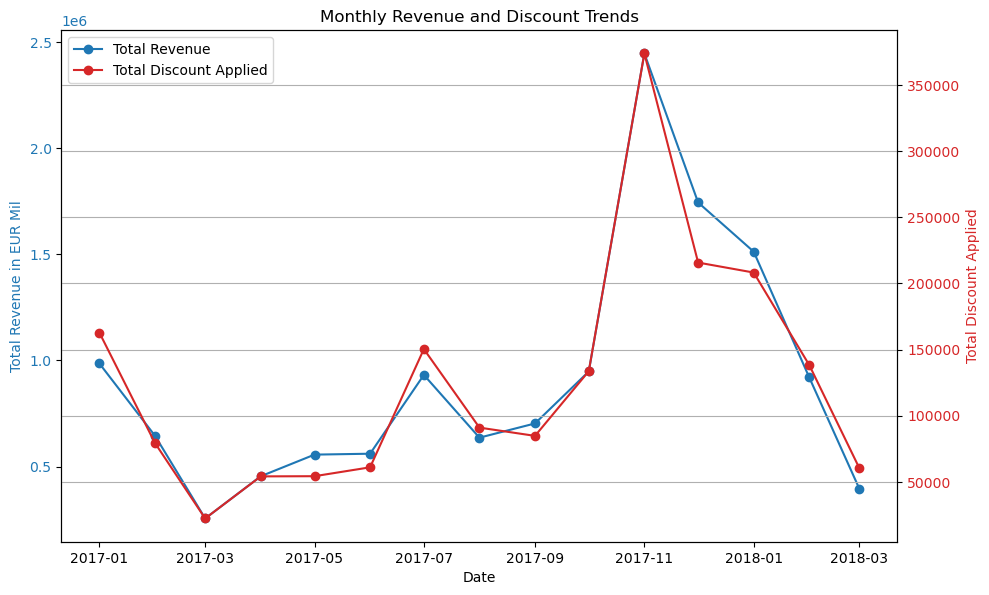

In [89]:
#How could data collection be improved?
# Data collection could be improved if every product could be categorised so we can have a vague understanding quickly to what type of products are actually selling more or less

In [90]:
#What is the time period that the dataset covers?
# The dataset covers Jan 2017 until March 2018

In [91]:
# What is the overall revenue for that time?
new_master['total_paid'].sum()

13693521.02

In [92]:
ol_products_full.groupby('sku')['product_quantity'].sum()

sku
8MO0001-A     1
8MO0003-A     1
8MO0007       7
8MO0008      11
8MO0009       5
             ..
ZAG0041       1
ZAG0042       1
ZEP0007       2
ZEP0008       1
par0072       3
Name: product_quantity, Length: 5418, dtype: int64

In [93]:
# Group by product SKU and calculate the total quantity sold
most_sold_products = ol_products_full.groupby('sku')['product_quantity'].sum().reset_index()

# Sort by total quantity sold in descending order
most_sold_products = most_sold_products.sort_values(by='product_quantity', ascending=False)

# Display the top 5 most sold products
top_5_most_sold_products = most_sold_products.head(5)
print("Top 5 Most Sold Products:")
print(top_5_most_sold_products)

Top 5 Most Sold Products:
          sku  product_quantity
465   APP1190              1756
368   APP0698              1059
2325  KIN0137               808
5221  WDT0183               749
388   APP0927               704


In [94]:
# Calculate the total revenue generated by each product
ol_products_full['total_revenue'] = ol_products_full['unit_price_total']

# Group by product SKU and calculate the total revenue
top_revenue_products = ol_products_full.groupby('sku')['total_revenue'].sum().reset_index()

# Sort by total revenue in descending order
top_revenue_products = top_revenue_products.sort_values(by='total_revenue', ascending=False)

# Display the top 5 products generating the most revenue
top_5_revenue_products = top_revenue_products.head(5)
print("Top 5 Products Generating the Most Revenue:")
print(top_5_revenue_products)

Top 5 Products Generating the Most Revenue:
          sku  total_revenue
869   APP2485      351125.47
860   APP2477      244733.31
867   APP2483      240197.59
759   APP2072      205899.45
2544  LGE0044      189854.17


In [104]:
# Group by brand and calculate the total quantity sold
top_quantity_brands = ol_products_full.groupby('brand')[['product_quantity']].sum().reset_index()

# Sort by total quantity sold in descending order
top_quantity_brands = top_quantity_brands.sort_values(by='product_quantity', ascending=False)

# Display the top 5 brands selling the most quantity
top_5_quantity_brands = top_quantity_brands.head(5)
print("Top 5 Brands Selling the Most Quantity:")
print(top_5_quantity_brands)

Top 5 Brands Selling the Most Quantity:
               brand  product_quantity
5              Apple             20770
100              OWC              5391
163  Western Digital              3688
67             LaCie              3150
9             Belkin              3067


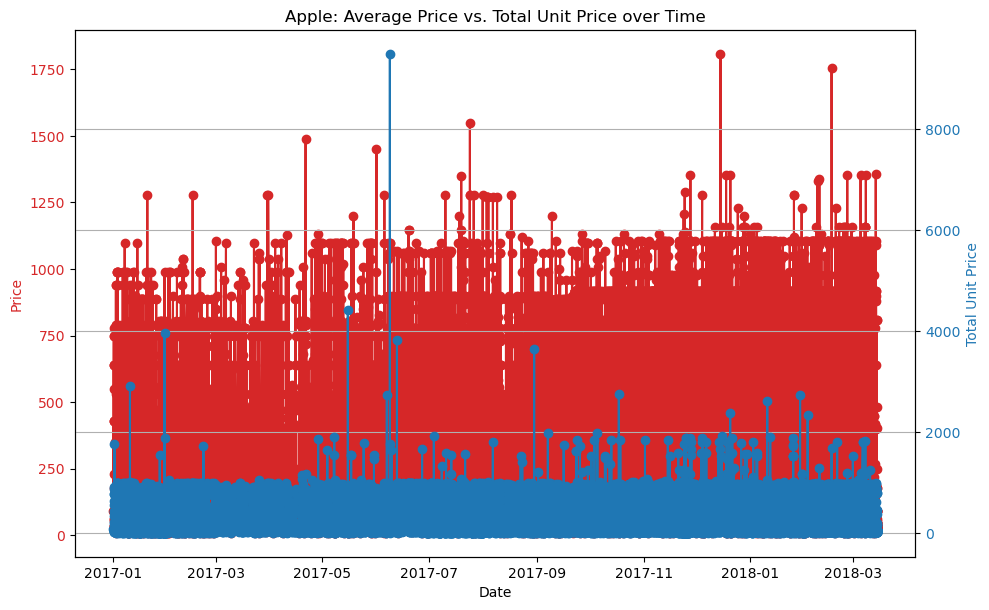

In [96]:
# Filter the dataframe to include only rows where the brand is "Apple"
apple_products = ol_products_full[ol_products_full['brand'] == 'Apple']

# Convert the date column to datetime format
apple_products['date'] = pd.to_datetime(apple_products['date'])

# Group by date and calculate the average price and total unit price
apple_daily_data = apple_products.groupby('date').agg({'price': 'sum', 'unit_price_total': 'sum'}).reset_index()

# Plot the dual-axis graph
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(apple_daily_data['date'], apple_daily_data['price'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Total Unit Price', color=color)  
ax2.plot(apple_daily_data['date'], apple_daily_data['unit_price_total'], color=color, marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Apple: Average Price vs. Total Unit Price over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

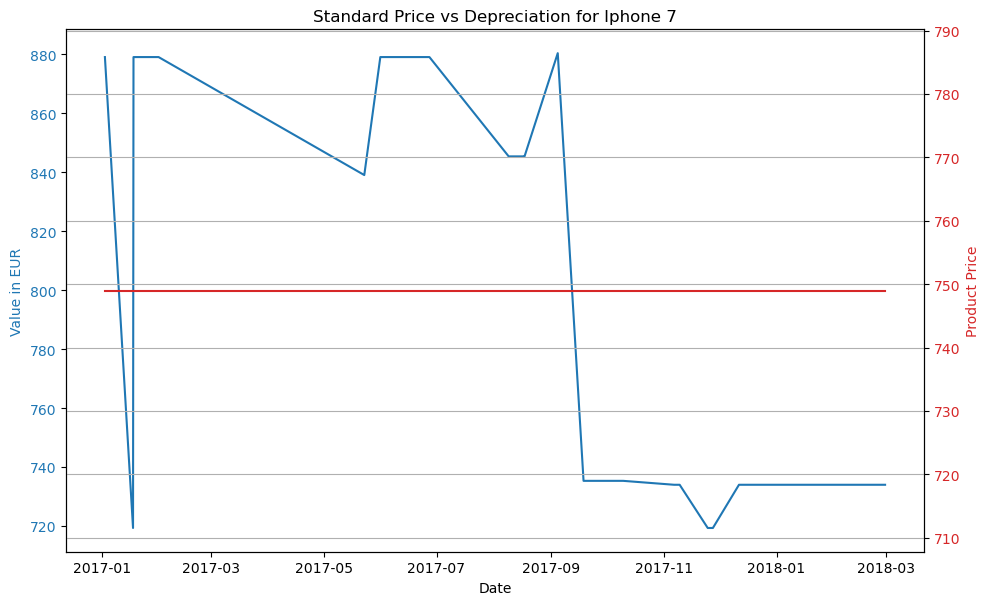

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ol_products is your DataFrame containing the data
# Replace it with your actual DataFrame if different
ol_products_filtered = ol_products.loc[ol_products["sku"] == "APP1651"]

# Convert 'date' column to datetime if it's not already
ol_products_filtered['date'] = pd.to_datetime(ol_products_filtered['date'])

# Aggregate data by date and calculate mean unit price and mean price for each date
mean_unit_price_by_date = ol_products_filtered.groupby('date')['unit_price'].mean()
mean_price_by_date = ol_products_filtered.groupby('date')['price'].mean()

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting mean unit price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value in EUR', color=color)
ax1.plot(mean_unit_price_by_date.index, mean_unit_price_by_date.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for mean price
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Product Price', color=color)
ax2.plot(mean_price_by_date.index, mean_price_by_date.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Standard Price vs Depreciation for Iphone 7')
plt.grid(axis='y')
plt.show()



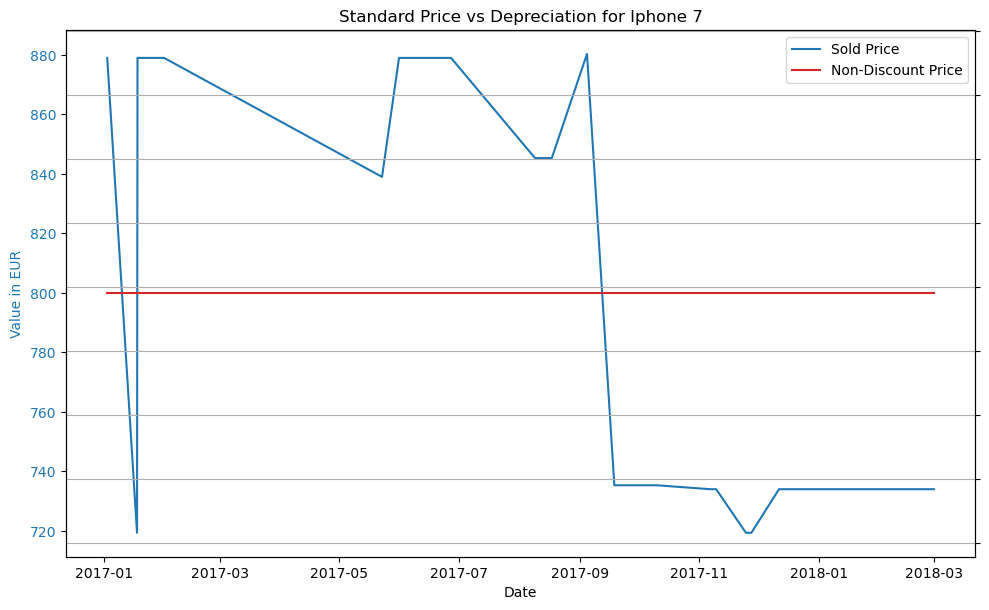

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ol_products is your DataFrame containing the data
# Replace it with your actual DataFrame if different
ol_products_filtered = ol_products.loc[ol_products["sku"] == "APP1651"]

# Convert 'date' column to datetime if it's not already
ol_products_filtered['date'] = pd.to_datetime(ol_products_filtered['date'])

# Aggregate data by date and calculate mean unit price and mean price for each date
mean_unit_price_by_date = ol_products_filtered.groupby('date')['unit_price'].mean()
mean_price_by_date = ol_products_filtered.groupby('date')['price'].mean()

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting mean unit price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value in EUR', color=color)
ax1.plot(mean_unit_price_by_date.index, mean_unit_price_by_date.values, color=color, label='Sold Price')
ax1.tick_params(axis='y', labelcolor=color)

# Plotting mean price on the secondary y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(mean_price_by_date.index, mean_price_by_date.values, color=color, label='Non-Discount Price')
ax2.tick_params(axis='y', labelcolor=color)

# Hide the y-axis on the right
ax2.yaxis.set_major_formatter(plt.NullFormatter())

# Moving the legend to the top right corner
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

fig.tight_layout()
plt.title('Standard Price vs Depreciation for Iphone 7')
plt.grid(axis='y')
plt.show()


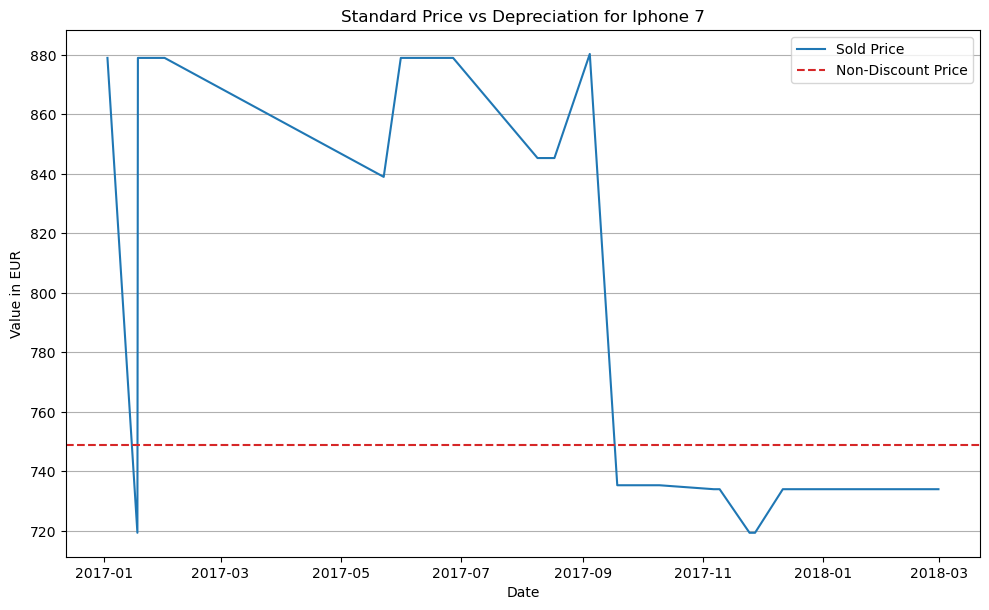

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ol_products is your DataFrame containing the data
# Replace it with your actual DataFrame if different
ol_products_filtered = ol_products.loc[ol_products["sku"] == "APP1651"]

# Convert 'date' column to datetime if it's not already
ol_products_filtered['date'] = pd.to_datetime(ol_products_filtered['date'])

# Aggregate data by date and calculate mean unit price and mean price for each date
mean_unit_price_by_date = ol_products_filtered.groupby('date')['unit_price'].mean()
mean_price_by_date = ol_products_filtered.groupby('date')['price'].mean()

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting mean unit price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value in EUR', color='black')
ax1.plot(mean_unit_price_by_date.index, mean_unit_price_by_date.values, color=color, label='Sold Price')
ax1.tick_params(axis='y', labelcolor="black")

# Draw a horizontal line at y=749
ax1.axhline(y=749, color='tab:red', linestyle='--', label='Non-Discount Price')

# Moving the legend to the top right corner
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Standard Price vs Depreciation for Iphone 7')
plt.grid(axis='y')
plt.show()


In [158]:
ol_products["date"].max()

Timestamp('2018-03-14 13:58:36')